In [89]:
import pandas as pd
import matplotlib.pyplot as plt   
import numpy as np
import seaborn as sns

In [90]:
dateCols = ['Date']
data = pd.read_csv("covid19.csv")

In [91]:
data.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


## droping unwanted values 

In [92]:
data.drop(columns=['Sno','Time','ConfirmedIndianNational',
                   'ConfirmedForeignNational'],inplace=True)

In [93]:
data.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,30/01/20,Kerala,0,0,1
1,31/01/20,Kerala,0,0,1
2,01/02/20,Kerala,0,0,2
3,02/02/20,Kerala,0,0,3
4,03/02/20,Kerala,0,0,3


In [94]:
#Chhattisgarh

temp = data["State/UnionTerritory"] == 'Chhattisgarh'
Chhattisgarh = data.loc[temp]

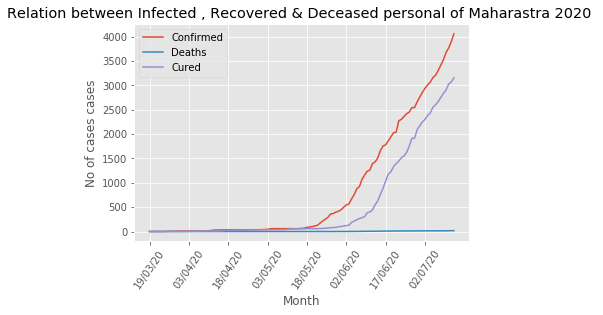

In [95]:
plt.style.use('ggplot')
plt.plot(Chhattisgarh.Date,Chhattisgarh.Confirmed,label="Confirmed")
plt.plot(Chhattisgarh.Date,Chhattisgarh.Deaths,label="Deaths")
plt.plot(Chhattisgarh.Date,Chhattisgarh.Cured,label="Cured")
plt.title("Relation between Infected , Recovered & Deceased personal of Maharastra 2020 ")
plt.xlabel("Month")
plt.ylabel("No of cases cases")
plt.xticks(Chhattisgarh.Date[0:118:15].tolist(),rotation=55)
plt.legend()
plt.show()

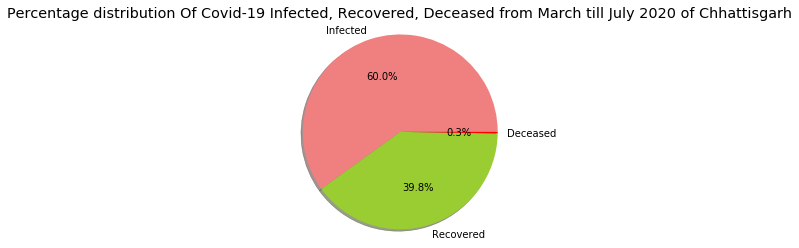

In [96]:
infected = sum(Chhattisgarh["Confirmed"])
deceased = sum(Chhattisgarh["Deaths"])
recovered = sum(Chhattisgarh["Cured"])

labels = ['Infected', 'Recovered', 'Deceased']
sizes = [infected, recovered, deceased]
colors = ['lightcoral', 'yellowgreen', 'red']
explode = (0, 0, 0) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.title("Percentage distribution Of Covid-19 Infected, Recovered, Deceased from March till July 2020 of Chhattisgarh")
plt.axis('equal')
plt.show()

### Correlation heatmap

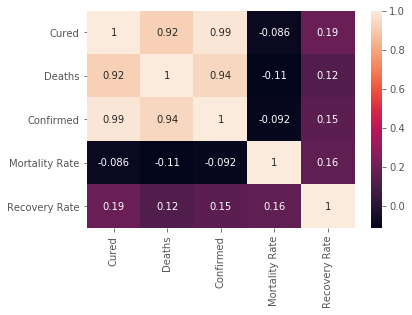

In [97]:
data['Mortality Rate'] = (data['Confirmed']/data['Deaths']).round(2)
data['Recovery Rate'] = (data['Cured']/data['Confirmed']).round(2)
sns.heatmap(data.corr(),annot=True)

###  Classifier for severity gauging

In [98]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [99]:
data2 = pd.read_excel('PAML_COVID_Dataset.xlsx')
data2.drop(columns=["Date","Time"],inplace=True)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3135 entries, 0 to 3134
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   State/UnionTerritory      3135 non-null   object
 1   ConfirmedIndianNational   3135 non-null   object
 2   Gender                    3135 non-null   object
 3   ConfirmedForeignNational  3135 non-null   object
 4   Age                       3135 non-null   int64 
 5   Serious symptoms          3135 non-null   object
 6   Less common symptoms      3135 non-null   object
 7   Most common symptoms      3135 non-null   object
 8   Severity                  3135 non-null   object
 9   Patient_Status            3135 non-null   object
dtypes: int64(1), object(9)
memory usage: 245.0+ KB


In [100]:
data2.head()

,State/UnionTerritory,ConfirmedIndianNational,Gender,ConfirmedForeignNational,Age,Serious symptoms,Less common symptoms,Most common symptoms,Severity,Patient_Status
0,Kerala,1,Male,0,5,difficulty breathing or shortness of breath,diarrhoea,fever,Seviour,Covid
1,Kerala,1,Female,0,8,chest pain or pressure,sore throat,tiredness,Mild,flu
2,Kerala,2,Male,0,39,loss of speech or movement,conjunctivitis,tiredness,Seviour,flu
3,Kerala,3,Female,0,63,loss of speech or movement,sore throat,tiredness,Seviour,Covid
4,Kerala,3,Male,0,6,chest pain or pressure,"a rash on skin, or discolouration of fingers o...",dry cough,Moderate,flu


### changing string to numbers 

In [ ]:
# have to do lable